In [2]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import datetime
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()


In [3]:
#Data Handling
#Preprocessing
#1. Based on the several files, I tried to merge the files with the primary keys
#2. Calculated the difference between the completed times and arrived times to get the service times
#3. Dropped records where the service times are negative and highly positive >200 
#4. Service time are in the hours in the output variable.

In [4]:
masterData = pd.read_csv('Masterorders.csv')
masterData.head()

order_id   item_id  packaging_type  sub_total  quantity  shelf_life  \
0    302762  108979.0             1.0    27768.0       3.0       120.0   
1    322226  102132.0             0.0    14268.0       2.0        45.0   
2    327439  102205.0             1.0     3138.0       1.0       810.0   
3    334130  102132.0             0.0     9512.0       1.0        45.0   
4    338882  109672.0             0.0     1665.0       5.0        45.0   

  is_catchweight temp_zone            units_type_name  net_weight  ...  \
0          False     Fresh    PA(240)LA(48)CS(8)EA(1)      48.000  ...   
1          False   Ambient     PA(48)LA(12)CS(1)EA(1)      21.100  ...   
2          False   Ambient    PA(288)LA(48)CS(6)EA(1)      47.995  ...   
3          False   Ambient     PA(48)LA(12)CS(1)EA(1)      21.100  ...   
4          False     Fresh  PA(600)LA(120)CS(10)EA(1)      26.250  ...   

                                                note  encoded_notes  \
0  {"parking":"Easy","stair":"Easy","assist":"fal...          313.0   
1  {"parking":"Easy","stair":"Easy","assist":fals...            1.0   
2  {"parking":"Easy","stair":"Easy","assist":fals...            1.0   
3  {"dock":false,"incline":"Easy","stair":"Easy",...            9.0   
4  {"parking":"Easy","stair":"Easy","assist":fals...            1.0   

   delivery_date  sub_total.1   volume.1   weight subscription_id  \
0      8/24/2020        27768   2.911158  159.900             NaN   
1      5/13/2020       144816  13.928039  652.200          4039.0   
2      4/30/2020        68210  23.930825  903.095             NaN   
3       4/3/2020        60989  24.289545  426.709             NaN   
4      7/21/2020        38512  16.400297  437.628             NaN   

        arrived_at     completed_at  serviceInHours  
0  8/24/2020 20:13  8/24/2020 20:15        0.034158  
1  5/13/2020 17:14  5/13/2020 17:39        0.412670  
2  4/30/2020 19:14  4/30/2020 19:40        0.427223  
3   4/3/2020 21:43   4/3/2020 21:53        0.176938  
4  7/21/2020 15:05  7/21/2020 15:11        0.090202  

[5 rows x 33 columns]

In [5]:
masterData.shape

(32103, 33)

In [6]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32103 entries, 0 to 32102
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               32103 non-null  int64  
 1   item_id                31863 non-null  float64
 2   packaging_type         31863 non-null  float64
 3   sub_total              31863 non-null  float64
 4   quantity               31863 non-null  float64
 5   shelf_life             31863 non-null  float64
 6   is_catchweight         31863 non-null  object 
 7   temp_zone              31863 non-null  object 
 8   units_type_name        31863 non-null  object 
 9   net_weight             31863 non-null  float64
 10  gross_weight           31863 non-null  float64
 11  volume                 31863 non-null  float64
 12  length                 31863 non-null  float64
 13  width                  31863 non-null  float64
 14  height                 31863 non-null  float64
 15  re

# Preprocessing

In [7]:
#Dropping the rows NAN in the item_id with the corresponding order_id's as it may not able to provide more insights about the data
masterData = masterData[masterData['item_id'].notna()]
#Dropping the additional fields created in the file merging which were used for primary, secondary and foreign key reference 



In [8]:
masterData.shape

(31863, 33)

In [9]:
#Filling the #N/A in the user_id column with the '9999999' just to avoid any kind of descrepencies in the future
masterData['user_id'].fillna(value = 999, inplace = True)
masterData['subscription_id'].fillna(value = 999, inplace = True)

In [10]:
#Appplying the label encoding for the field "note"
#1. First converting the missing values "NANs" to string datatype
#. Finally applyiong the label encoding to the note field
masterData.note = masterData.note.fillna('NAN')
# Encode labels in column 'note'. 
masterData['note']= label_encoder.fit_transform(masterData['note']) 

#Applying the label encoding for the field "is_catchweight"
# Encode labels in column "is_catchweight" 
masterData['is_catchweight']= label_encoder.fit_transform(masterData['is_catchweight'])

#Applying the label encoding for the field "temp_zone"
masterData['temp_zone']= label_encoder.fit_transform(masterData['temp_zone'])

#Applying the label encoding for the field "units_type_name"
masterData['units_type_name']= label_encoder.fit_transform(masterData['units_type_name'])

#Applying the label encoding for the field "city"
masterData['city']= label_encoder.fit_transform(masterData['city'])

#Applying the label encoding for the field "customer_segment_name"
masterData['customer_segment_name']= label_encoder.fit_transform(masterData['customer_segment_name'])


In [11]:
#Feature engineering to handle the delievery dates:
#masterData['arrived_at'] = pd.to_datetime(masterData['arrived_at'],format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
masterData['delivery_date'] = pd.to_datetime(masterData['delivery_date'])
#masterData['delivery_date'] = masterData['delivery_date'].astype('datetime64[ns]')



In [12]:
masterData['delivery_year'] =masterData['delivery_date'].dt.year
masterData['delivery_month'] = masterData['delivery_date'].dt.month
masterData['delivery_week'] = masterData['delivery_date'].dt.week
masterData['delivery_day'] = masterData['delivery_date'].dt.day
masterData['delivery_dayofweek'] = masterData['delivery_date'].dt.dayofweek

<ipython-input-12-c99d86a4b0aa>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  masterData['delivery_week'] = masterData['delivery_date'].dt.week


In [13]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31863 entries, 0 to 32102
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               31863 non-null  int64         
 1   item_id                31863 non-null  float64       
 2   packaging_type         31863 non-null  float64       
 3   sub_total              31863 non-null  float64       
 4   quantity               31863 non-null  float64       
 5   shelf_life             31863 non-null  float64       
 6   is_catchweight         31863 non-null  int32         
 7   temp_zone              31863 non-null  int32         
 8   units_type_name        31863 non-null  int32         
 9   net_weight             31863 non-null  float64       
 10  gross_weight           31863 non-null  float64       
 11  volume                 31863 non-null  float64       
 12  length                 31863 non-null  float64       
 13  w

In [14]:
pulpMasterData = masterData
pulpMasterData.drop(['arrived_at', 'completed_at', 'delivery_date'], axis=1, inplace=True)
pulpMasterData = pulpMasterData[['packaging_type', 'sub_total', 'quantity',
       'shelf_life', 'is_catchweight', 'temp_zone', 'units_type_name',
       'net_weight', 'gross_weight', 'volume', 'length', 'width', 'height',
       'customer_segment_name', 'note',  'sub_total.1', 'volume.1', 'weight',
       'delivery_month', 'delivery_week', 'delivery_day', 'delivery_dayofweek','serviceInHours']]


In [15]:
pulpMasterData.describe()

packaging_type      sub_total      quantity    shelf_life  \
count    31863.000000   31863.000000  31863.000000  31863.000000   
mean         0.193704    5856.910994      2.292879    310.891159   
std          0.395206   11377.445499      4.171933    381.066223   
min          0.000000       0.000000      1.000000      5.000000   
25%          0.000000    1474.000000      1.000000     20.000000   
50%          0.000000    2909.000000      1.000000    240.000000   
75%          0.000000    5808.000000      2.000000    365.000000   
max          1.000000  435499.000000    118.000000   9999.000000   

       is_catchweight     temp_zone  units_type_name    net_weight  \
count    31863.000000  31863.000000     31863.000000  31863.000000   
mean         0.042746      0.644729       504.437655     24.577101   
std          0.202286      0.672653       270.006214     13.979473   
min          0.000000      0.000000         0.000000      0.000000   
25%          0.000000      0.000000       291.000000     12.000000   
50%          0.000000      1.000000       580.000000     24.500000   
75%          0.000000      1.000000       718.000000     35.000000   
max          1.000000      2.000000       908.000000     85.000000   

       gross_weight        volume  ...  customer_segment_name          note  \
count  31863.000000  31863.000000  ...           31863.000000  31863.000000   
mean      25.564504      0.976752  ...               0.048709    369.253554   
std       14.223950      0.752066  ...               0.215261    198.076576   
min        0.000000      0.000488  ...               0.000000      0.000000   
25%       13.000000      0.492474  ...               0.000000    271.000000   
50%       25.220000      0.874994  ...               0.000000    296.000000   
75%       36.100000      1.181271  ...               0.000000    533.000000   
max       87.000000     15.748344  ...               1.000000    774.000000   

         sub_total.1      volume.1        weight  delivery_month  \
count   31863.000000  31863.000000  31863.000000    31863.000000   
mean    55411.258639     17.470699    472.742775        7.864514   
std     49791.892298     15.411766    418.398763        2.467859   
min         0.000000      0.015469      0.000000        4.000000   
25%     26203.000000      7.403791    194.611667        6.000000   
50%     43710.000000     13.715824    366.980000        8.000000   
75%     67811.500000     22.880626    620.564500       10.000000   
max    919479.000000    497.083480   8301.500000       12.000000   

       delivery_week  delivery_day  delivery_dayofweek  serviceInHours  
count   31863.000000  31863.000000         31863.00000    31863.000000  
mean       32.889088     15.761385             2.39265        0.411794  
std        10.840568      8.762098             1.70254        2.153395  
min        14.000000      1.000000             0.00000        0.000000  
25%        24.000000      8.000000             1.00000        0.157378  
50%        33.000000     16.000000             2.00000        0.276310  
75%        42.000000     23.000000             4.00000        0.430338  
max        53.000000     31.000000             6.00000      194.341668  

[8 rows x 23 columns]

In [16]:
# Find the correlation 
fig, ax = plt.subplots(figsize=(20,20), dpi=500)
col_corr =pulpMasterData.corr()
sns.heatmap(col_corr, annot=True)
sns.plt.title('Heatmap of Correlation Matrix')

AttributeError: module 'seaborn' has no attribute 'plt'

#Identifying the highly correlated fields

In [17]:
correlated_features = set()
correlation_matrix = pulpMasterData.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)

print(correlated_features)

{'weight', 'delivery_week', 'gross_weight'}


C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'packaging_type')]

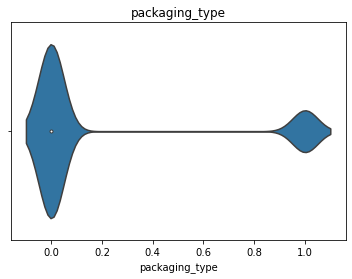

In [18]:
#View range and distribution of the source_performance_12_months
sns.violinplot(pulpMasterData['packaging_type']).set(title='packaging_type')

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'sub_total')]

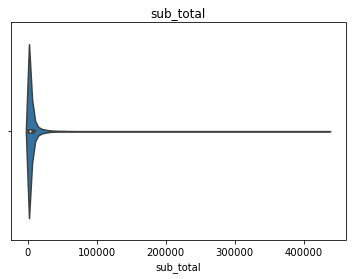

In [19]:
sns.violinplot(pulpMasterData['sub_total']).set(title='sub_total')


C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'quantity')]

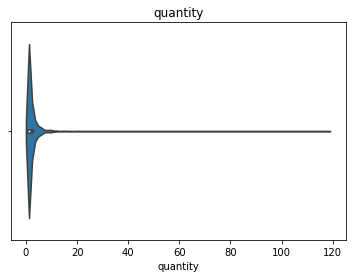

In [20]:
sns.violinplot(pulpMasterData['quantity']).set(title='quantity')

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'shelf_life')]

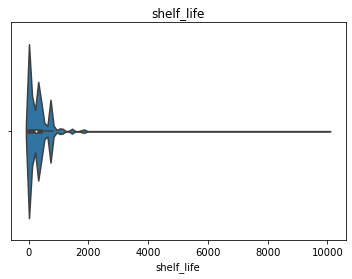

In [21]:
sns.violinplot(pulpMasterData['shelf_life']).set(title='shelf_life')

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


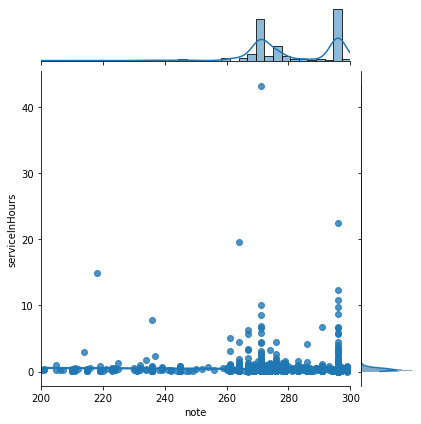

In [22]:
sampleData = pulpMasterData.sample(frac =.50)
#sampleData = pulpMasterData.sample(frac =.50)
sampleData = sampleData.loc[(sampleData['note'] >= 200) & (sampleData['note'] <= 300)]
scattered_plot = sns.jointplot('note', 'serviceInHours', data =sampleData , kind = 'reg')

In [23]:
sampleData.corr()

packaging_type  sub_total  quantity  shelf_life  \
packaging_type               1.000000   0.088535 -0.061251    0.050757   
sub_total                    0.088535   1.000000  0.497225    0.000381   
quantity                    -0.061251   0.497225  1.000000   -0.056442   
shelf_life                   0.050757   0.000381 -0.056442    1.000000   
is_catchweight              -0.079711   0.269125  0.001073   -0.063019   
temp_zone                   -0.002582   0.124124  0.051167   -0.322704   
units_type_name             -0.011119   0.011455 -0.046051   -0.003471   
net_weight                   0.014117   0.165051 -0.003267   -0.030829   
gross_weight                 0.022576   0.172849 -0.000390   -0.020795   
volume                      -0.086352   0.041653 -0.055845    0.056018   
length                       0.001478   0.040901 -0.070417    0.060508   
width                       -0.019778   0.013930 -0.113998    0.062659   
height                       0.000946   0.030171  0.015165    0.070389   
customer_segment_name       -0.047151  -0.049953 -0.040314   -0.020292   
note                         0.014112   0.004552  0.003780   -0.013254   
sub_total.1                  0.072488   0.221417  0.076730    0.045854   
volume.1                     0.035416   0.078634  0.104202    0.030260   
weight                       0.054884   0.140830  0.186789    0.024530   
delivery_month               0.005575   0.031479  0.027743    0.025279   
delivery_week                0.003786   0.032211  0.027919    0.026018   
delivery_day                -0.016040   0.005666 -0.002231    0.003521   
delivery_dayofweek          -0.012054  -0.011553 -0.026199   -0.022058   
serviceInHours               0.006349   0.000966  0.003870   -0.011663   

                       is_catchweight  temp_zone  units_type_name  net_weight  \
packaging_type              -0.079711  -0.002582        -0.011119    0.014117   
sub_total                    0.269125   0.124124         0.011455    0.165051   
quantity                     0.001073   0.051167        -0.046051   -0.003267   
shelf_life                  -0.063019  -0.322704        -0.003471   -0.030829   
is_catchweight               1.000000   0.226898        -0.113594    0.153266   
temp_zone                    0.226898   1.000000         0.009522   -0.054830   
units_type_name             -0.113594   0.009522         1.000000    0.242915   
net_weight                   0.153266  -0.054830         0.242915    1.000000   
gross_weight                 0.160796  -0.051484         0.235553    0.996061   
volume                       0.029047  -0.047065         0.171772    0.334589   
length                       0.092700  -0.038818         0.121973    0.346740   
width                        0.074953   0.000597         0.127067    0.413650   
height                      -0.090461  -0.170177         0.143373    0.219438   
customer_segment_name        0.035841   0.053328        -0.012017   -0.061183   
note                        -0.003113  -0.008889        -0.005163   -0.021433   
sub_total.1                  0.043812   0.003196         0.008156    0.036724   
volume.1                    -0.041332  -0.032563         0.022337    0.050240   
weight                      -0.032243  -0.028719         0.026420    0.105029   
delivery_month              -0.016003   0.016812        -0.000428    0.020625   
delivery_week               -0.014127   0.016132        -0.004955    0.017773   
delivery_day                 0.019324   0.000739        -0.036792   -0.023206   
delivery_dayofweek           0.030324   0.024295        -0.000243   -0.006084   
serviceInHours              -0.010819  -0.011994         0.015751    0.033677   

                       gross_weight    volume  ...  customer_segment_name  \
packaging_type             0.022576 -0.086352  ...              -0.047151   
sub_total                  0.172849  0.041653  ...              -0.049953   
quantity                  -0.000390 -0.055845  ...              -0.040

<AxesSubplot:xlabel='delivery_month', ylabel='count'>

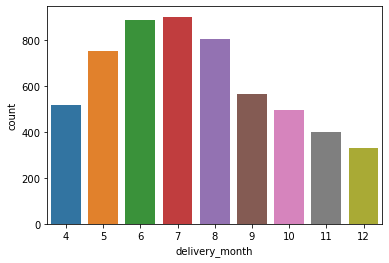

In [24]:
sns.countplot(x="delivery_month", data=sampleData)

<AxesSubplot:>

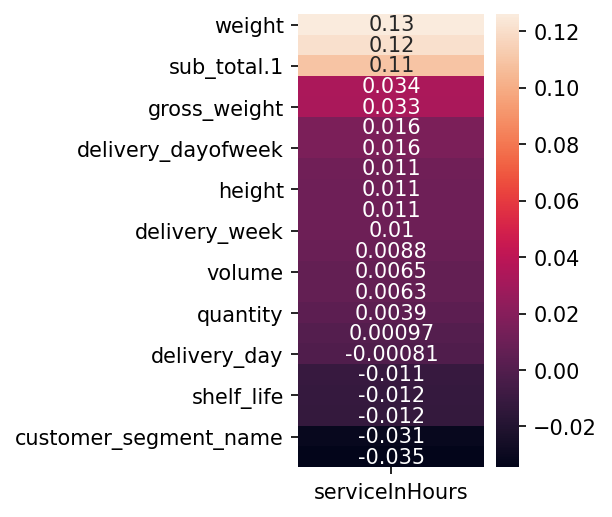

In [25]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(sampleData.corr()[["serviceInHours"]].sort_values(by="serviceInHours", ascending=False)[1:],annot=True)

<Figure size 1800x1200 with 0 Axes>

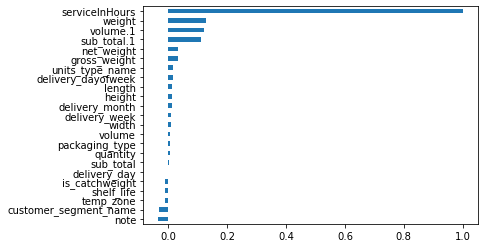

In [26]:
plt.figure(figsize=(12,8), dpi=150)
sampleData.corr()[["serviceInHours"]].sort_values(by="serviceInHours").plot(kind="barh", legend=False);

<AxesSubplot:ylabel='serviceInHours'>

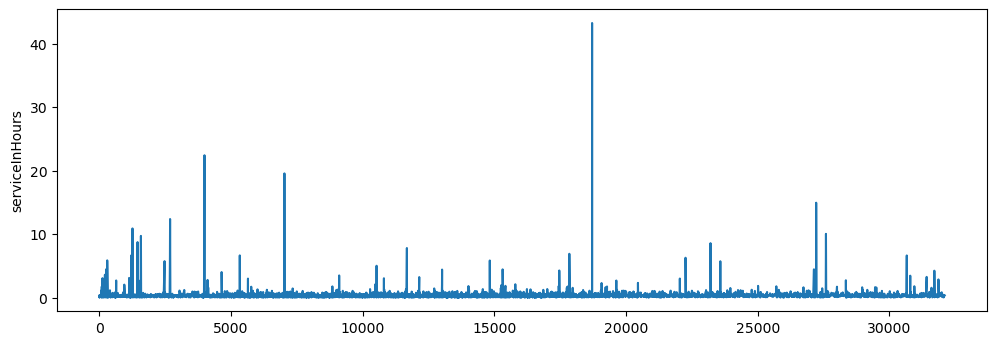

In [27]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(x=sampleData.index,y="serviceInHours", data=sampleData)

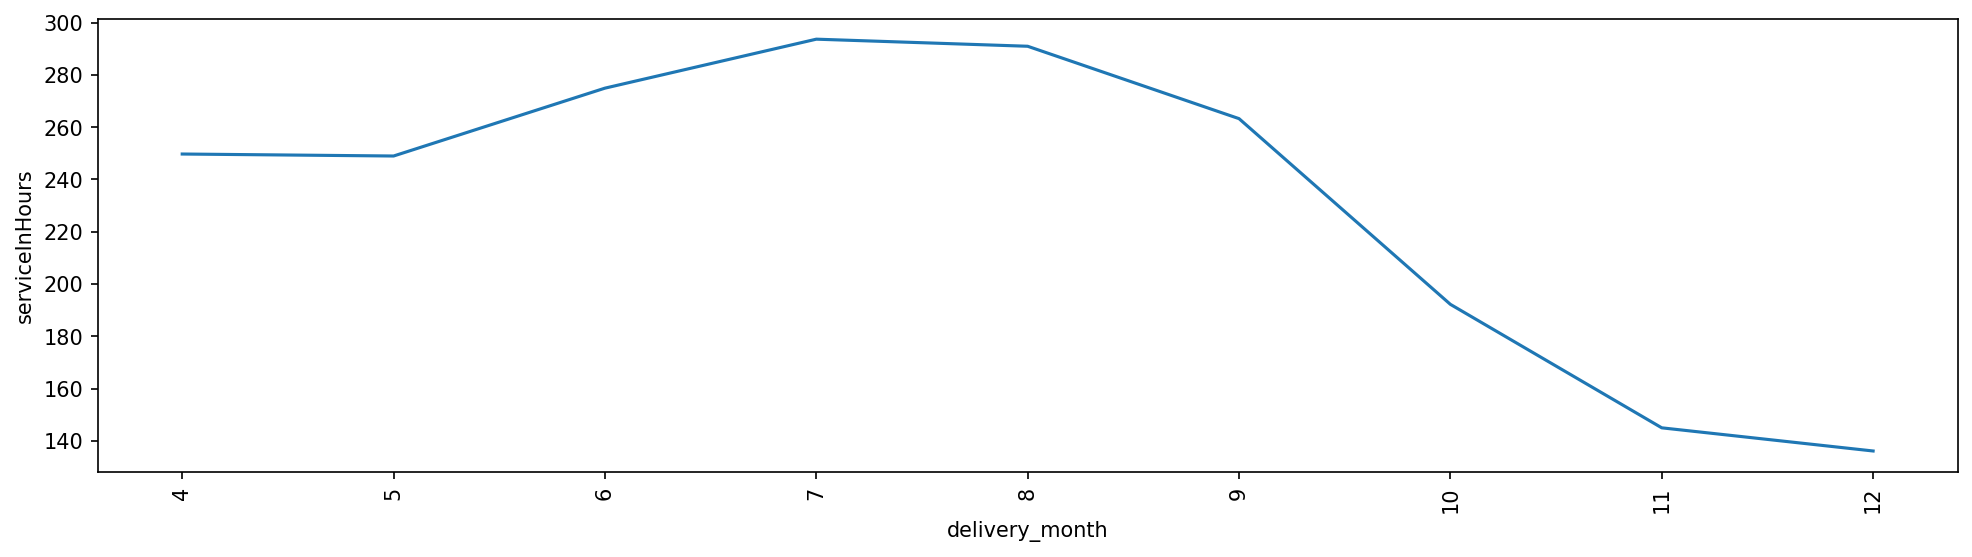

In [28]:
year_month = sampleData.groupby("delivery_month").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.lineplot(x="delivery_month", y="serviceInHours", data=year_month)
plt.xticks(rotation=90);

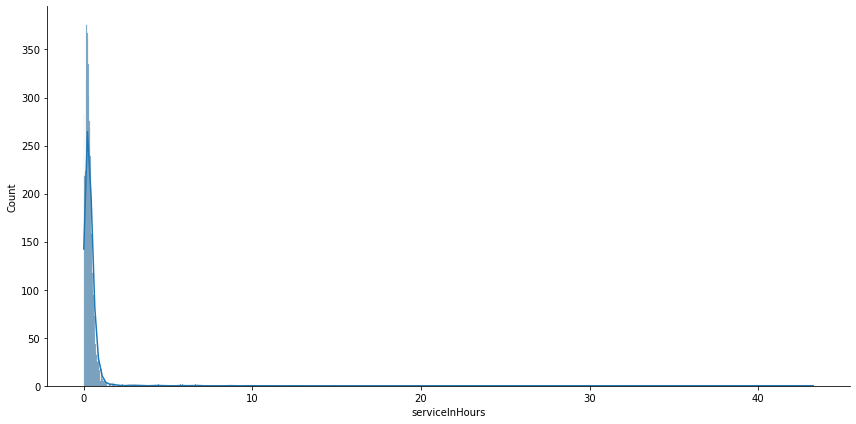

In [29]:
sns.displot(x = 'serviceInHours', data = sampleData, aspect = 2, height = 6, kde = True);

In [30]:
numerical_df = sampleData.select_dtypes(exclude='object')

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


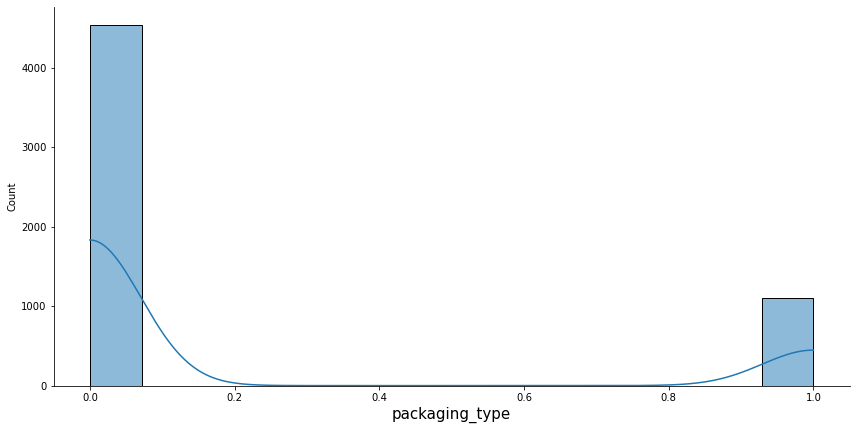

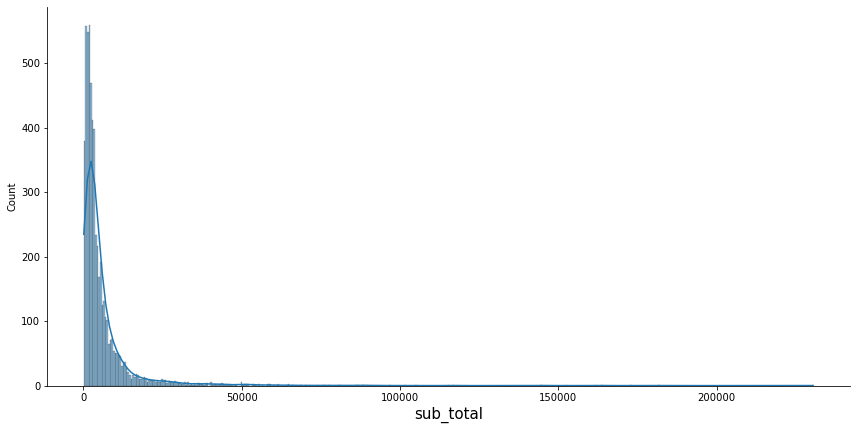

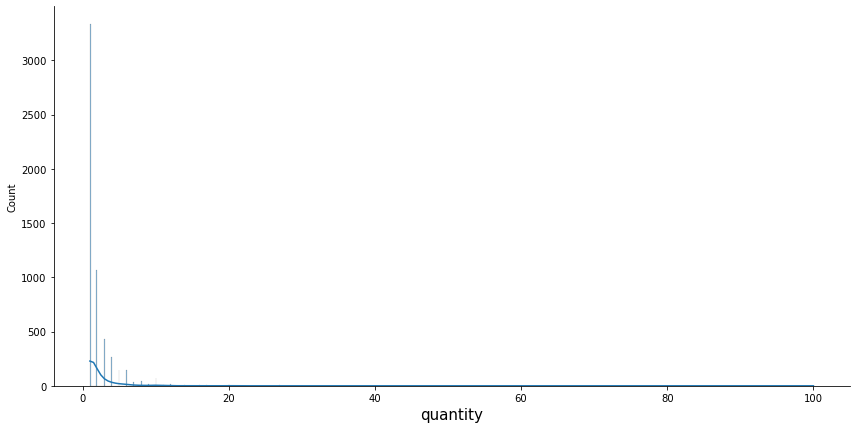

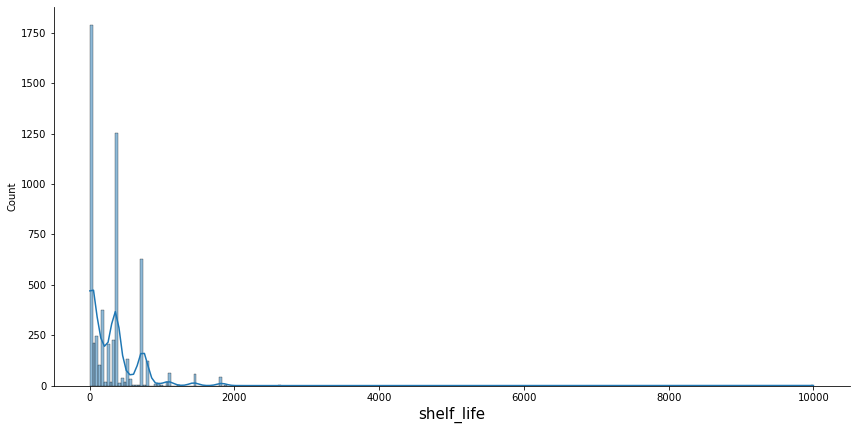

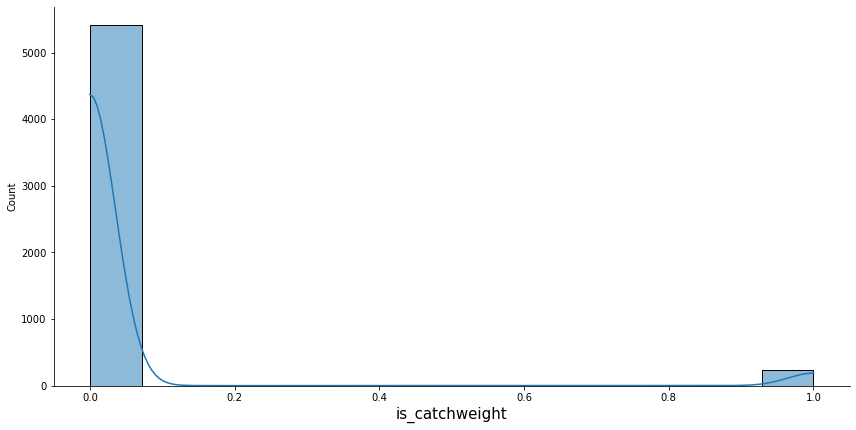

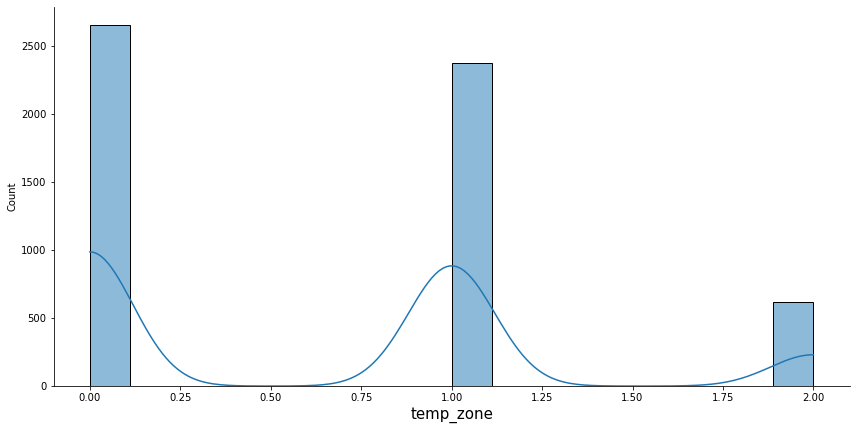

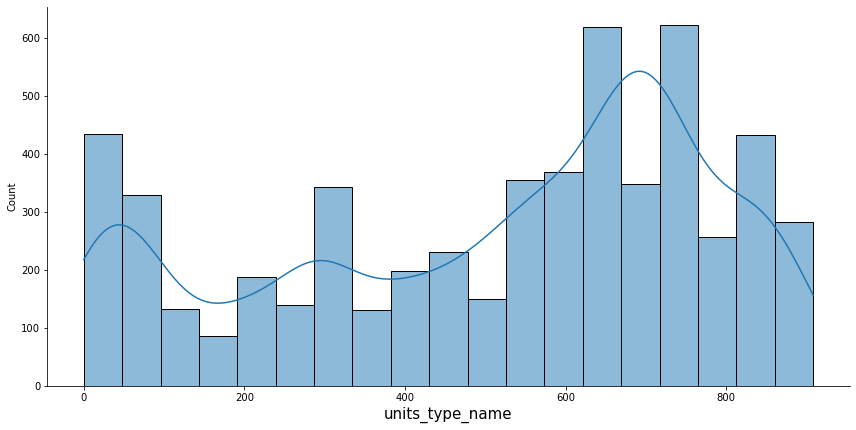

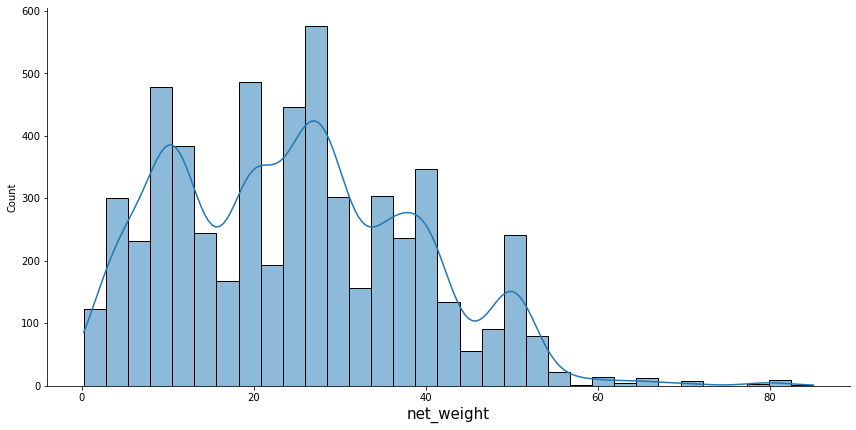

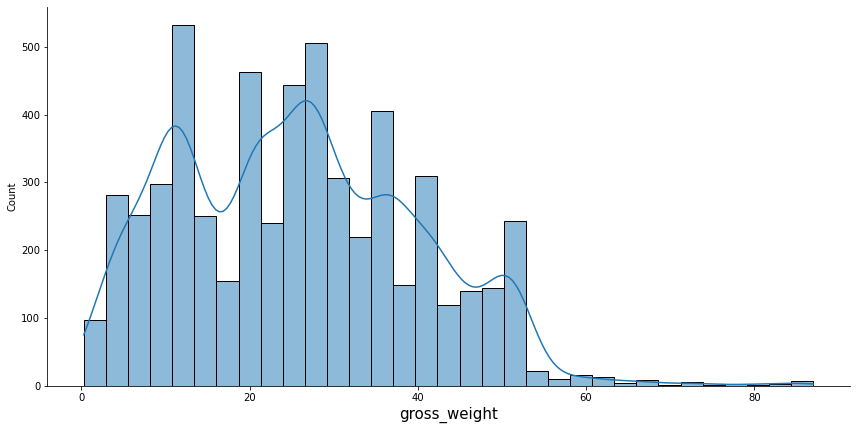

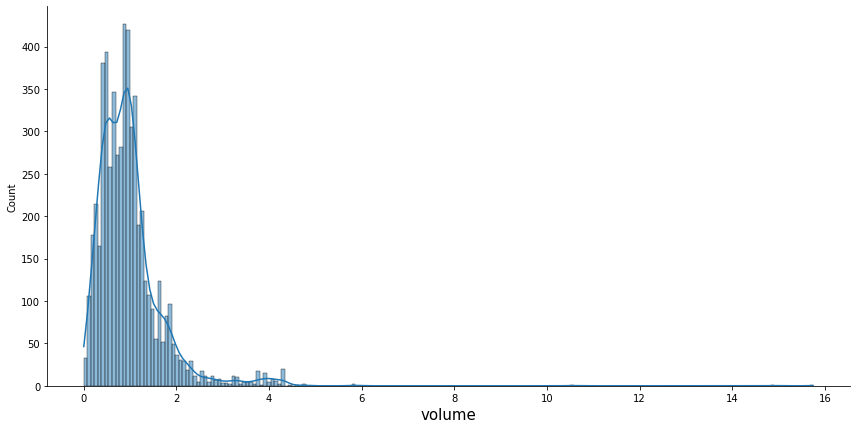

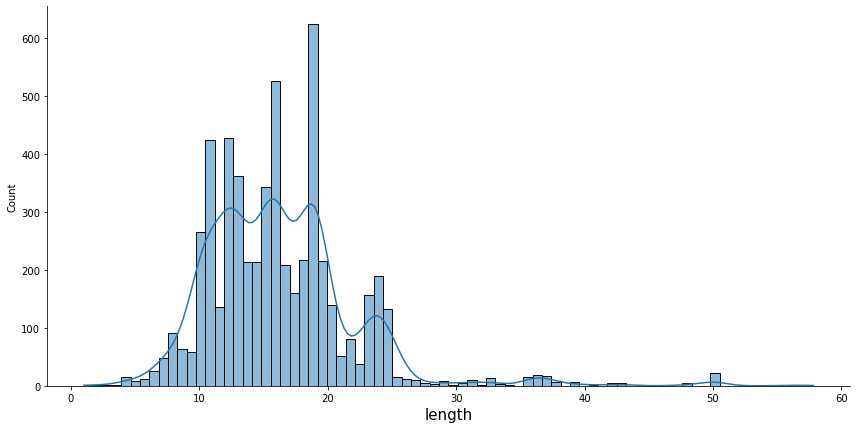

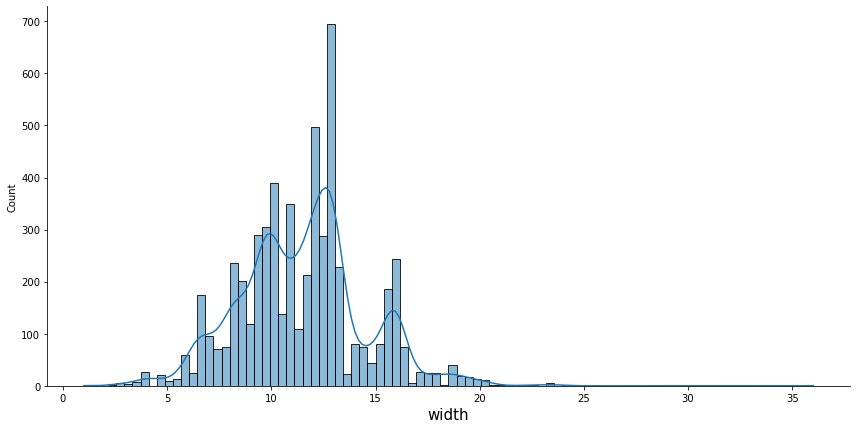

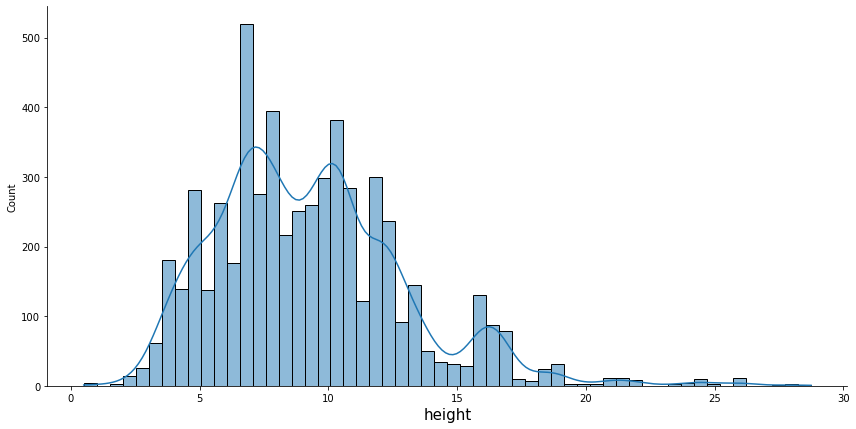

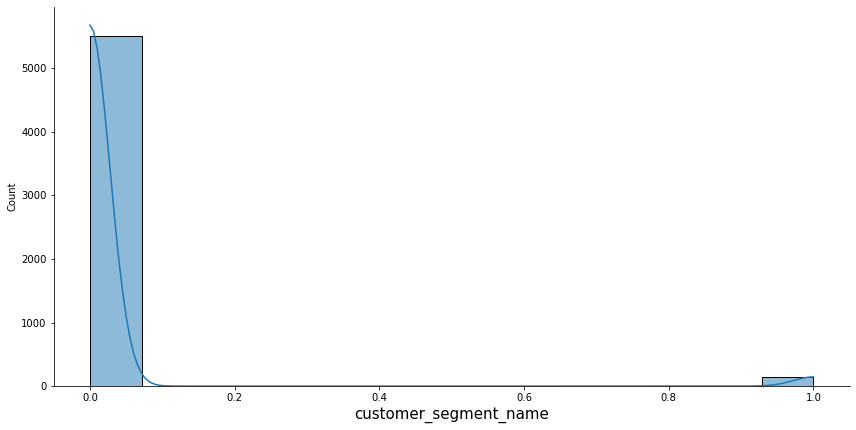

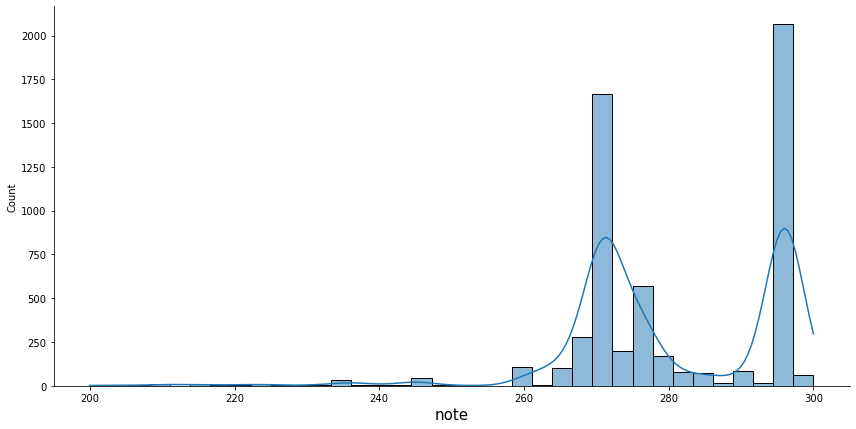

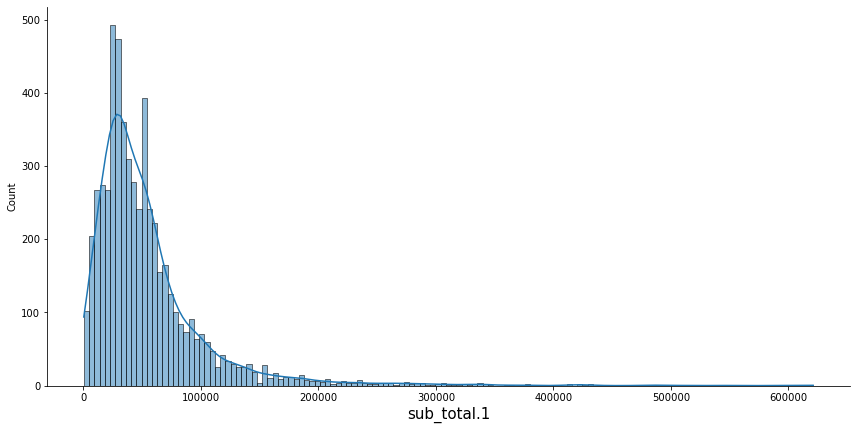

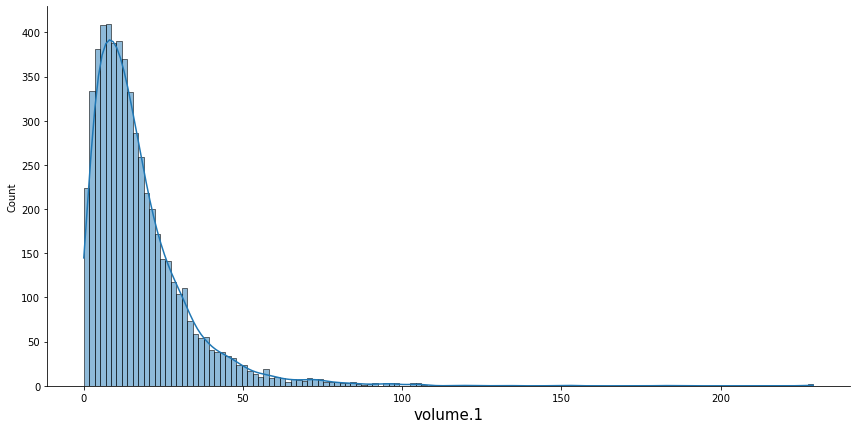

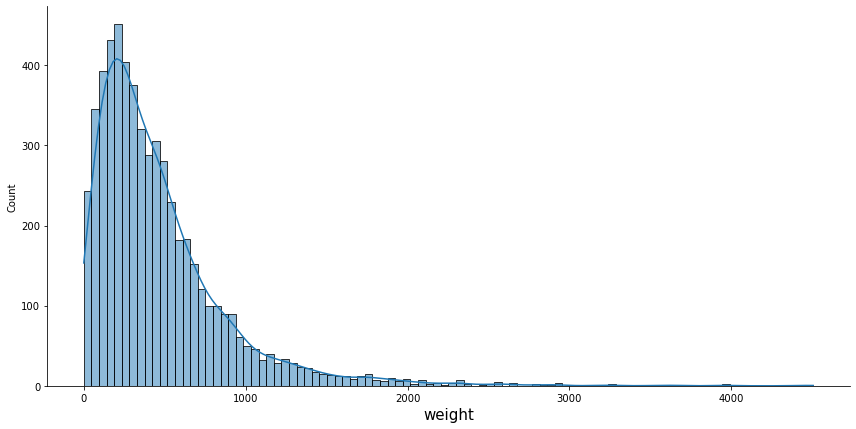

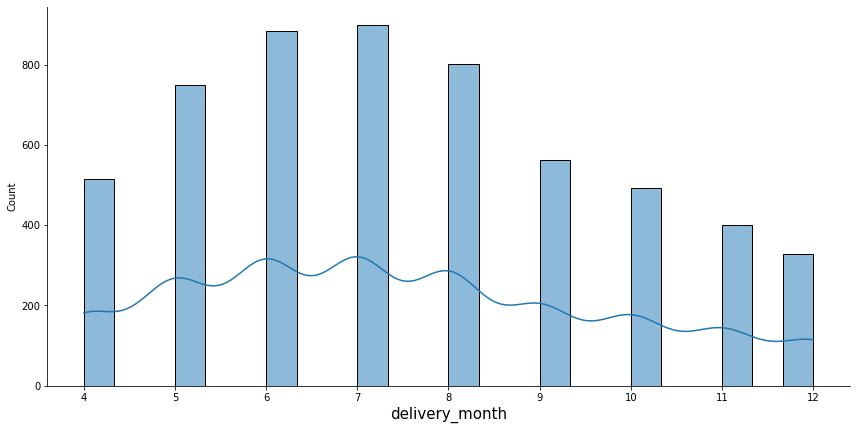

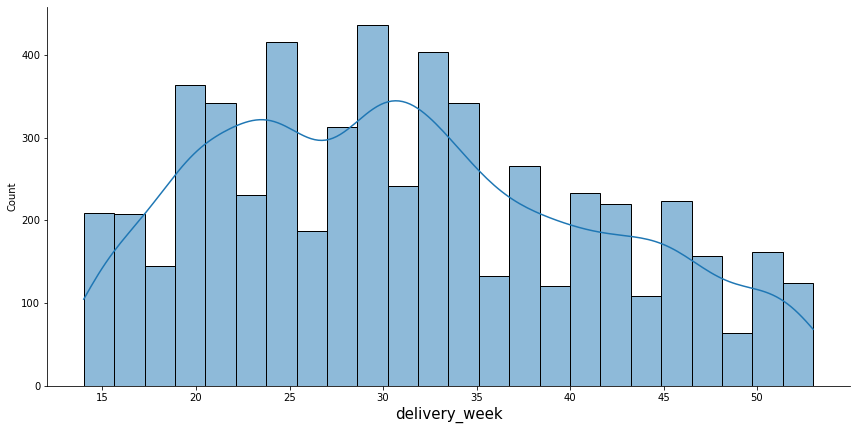

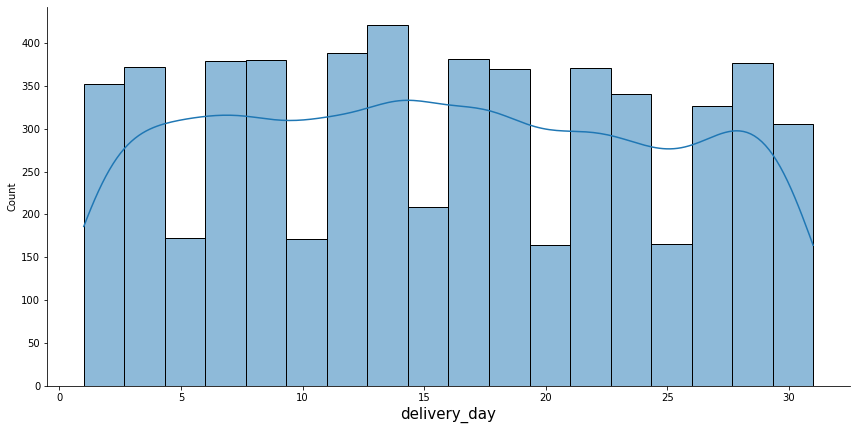

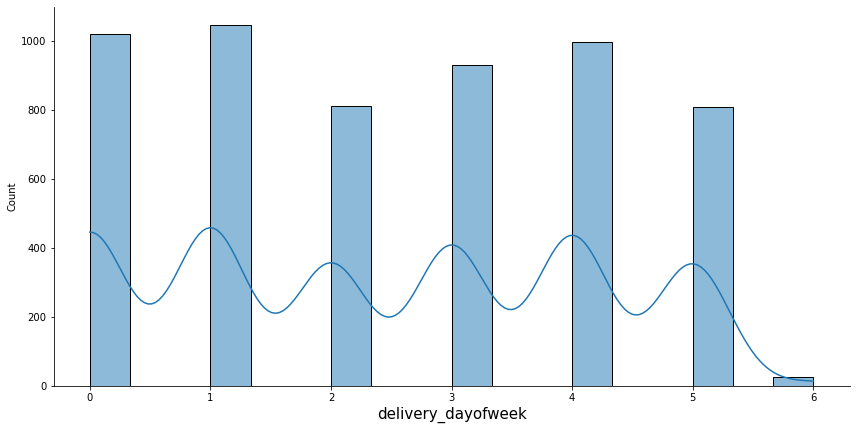

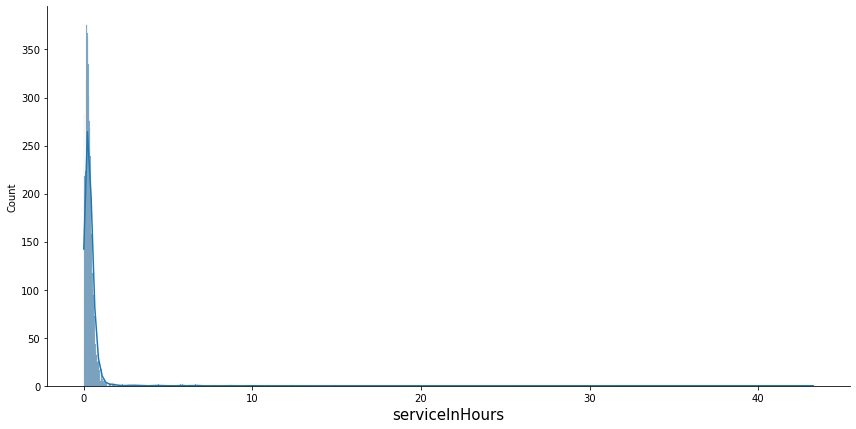

In [31]:
for i in numerical_df:
  sns.displot(x = i, data = sampleData, height = 6, aspect = 2, kde = True);
  plt.xlabel(i, fontsize = 15)

In [32]:
pulpMasterData[pulpMasterData.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
y = pulpMasterData['serviceInHours']
pulpMasterData.drop(['serviceInHours'], axis = 1, inplace = True)
X = pulpMasterData

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28676, 22), (3187, 22), (28676,), (3187,))

In [35]:
model_score = pd.DataFrame(columns = ("R2_Score","RMSE","MAE"))

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, mean_squared_error, make_scorer

In [37]:
lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)



LinearRegression(normalize=True)

In [38]:
lr.score(X_test, y_test)

0.009451872936749761

In [39]:
preds = lr.predict(X_test)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

RMSE: 1.544175
MAE: 0.251284


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = 1 - (np.sum((y_test - preds) ** 2)  / np.sum((y_test - y_test.mean()) ** 2))
print("R2:", r2)

R2: 0.009451872936749761


In [42]:
model_score = model_score.append(pd.DataFrame({"R2_Score":[r2],
                                               "RMSE":[rmse],
                                              "MAE":[mae]}, index = ['LinearRegression']))

In [43]:
actual = pd.DataFrame(data = y_test.values, columns = ["actual"])
predicted = pd.DataFrame(data = preds, columns = ["predicted"])

final = pd.concat([actual, predicted], axis = 1)
final

actual  predicted
0     0.032538   0.405170
1     0.195117   0.461477
2     0.400040   0.679994
3     0.123198   0.599155
4     0.100659   0.358978
...        ...        ...
3182  0.646043   0.476963
3183  0.271274   0.449435
3184  0.077012   0.244350
3185  0.291465   0.450911
3186  0.508061   0.722561

[3187 rows x 2 columns]

In [44]:
from xgboost.sklearn import XGBRegressor

In [45]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train, y_train)

preds = xgbmodel.predict(X_test)

In [46]:
print("Score", xgbmodel.score(X_test, y_test))

Score -0.08278754552758505


In [47]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

RMSE: 1.614472
MAE: 0.274968


In [48]:
r2 = 1 - (np.sum((y_test - preds) ** 2)  / np.sum((y_test - y_test.mean()) ** 2))
print("R2:", r2)

R2: -0.08278754552758505


In [49]:
model_score = model_score.append(pd.DataFrame({"R2_Score":[r2],
                                               "RMSE":[rmse],
                                              "MAE":[mae]}, index = ['XGBoostRegressor']))

In [50]:
actual = pd.DataFrame(data = y_test.values, columns = ["actual"])
predicted = pd.DataFrame(data = preds, columns = ["predicted"])

final = pd.concat([actual, predicted], axis = 1)
final

actual  predicted
0     0.032538   0.276353
1     0.195117   0.313344
2     0.400040   0.435676
3     0.123198   0.315072
4     0.100659   0.124728
...        ...        ...
3182  0.646043   0.249169
3183  0.271274   0.415855
3184  0.077012   0.322995
3185  0.291465   0.494223
3186  0.508061   0.393577

[3187 rows x 2 columns]

In [51]:
y_test.values

array([0.03253806, 0.1951175 , 0.40004028, ..., 0.07701194, 0.29146528,
       0.50806139])

In [52]:
from sklearn.linear_model import Lasso

In [53]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train, y_train)

Lasso(alpha=0.01)

In [54]:
preds = ls.predict(X_test)

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

RMSE: 1.543329
MAE: 0.245347


In [56]:
r2 = 1 - (np.sum((y_test - preds) ** 2)  / np.sum((y_test - y_test.mean()) ** 2))
print("R2:", r2)

R2: 0.010537678538810491


In [57]:
model_score = model_score.append(pd.DataFrame({"R2_Score":[r2],
                                               "RMSE":[rmse],
                                              "MAE":[mae]}, index = ['LassoRegressor']))

In [58]:
actual = pd.DataFrame(data = y_test.values, columns = ["actual"])
predicted = pd.DataFrame(data = preds, columns = ["predicted"])

final = pd.concat([actual, predicted], axis = 1)
final

actual  predicted
0     0.032538   0.387719
1     0.195117   0.427493
2     0.400040   0.619049
3     0.123198   0.537545
4     0.100659   0.349986
...        ...        ...
3182  0.646043   0.456739
3183  0.271274   0.505163
3184  0.077012   0.279718
3185  0.291465   0.433451
3186  0.508061   0.670446

[3187 rows x 2 columns]

In [59]:
model_score

R2_Score      RMSE       MAE
LinearRegression  0.009452  1.544175  0.251284
XGBoostRegressor -0.082788  1.614472  0.274968
LassoRegressor    0.010538  1.543329  0.245347